In [54]:
%matplotlib inline

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.io import imread
from skimage import filters
from skimage.feature import canny
from skimage import segmentation as sgmt
from skimage import color
from skimage import measure

import cv2 as cv

In [88]:
crystals = imread("images/crystals4.tif")

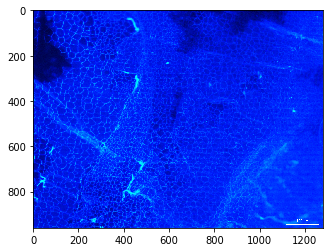

In [89]:
plt.imshow(crystals)

In [92]:
plt.imsave("output/crystals4-grayscale.jpg", color.rgb2gray(crystals))

In [120]:
gray = color.rgb2gray(crystals)

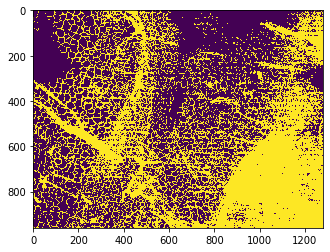

In [182]:
thresh = np.array([np.array([1 if n > 0.155 else 0 for n in gray[x]]) for x in range(len(gray))])
plt.imsave("output/crystals4-threshed.jpg",thresh)
plt.imshow(thresh)


In [174]:
edges = canny(gray, sigma = 0.5)
plt.imsave("output/crystals4-canny-sigma0.4.jpg",edges)
type(edges)

numpy.ndarray

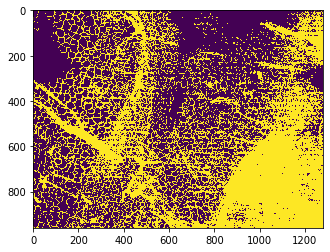

In [165]:
filtered = filters.median(gray, selem = np.ones((5,5)))
filterthresh = np.array([np.array([1 if n > 0.155 else 0 for n in gray[x]]) for x in range(len(gray))])
plt.imsave("output/crystals4-filterthreshed.jpg",filterthresh)
plt.imshow(filterthresh)

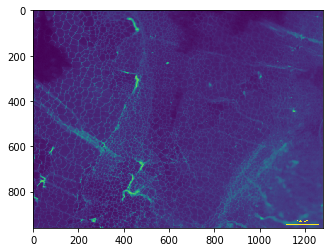

In [162]:
plt.imshow(filtered)
plt.imsave("output/crystals4-filtered.jpg",filtered)

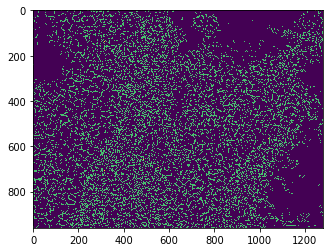

In [186]:
dt = ndi.distance_transform_edt(edges)
plt.imshow(dt)
plt.imsave("output/crystals4-dt.jpg",dt)

In [243]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4,random_state = 5)
clusters = model.fit_predict(gray.reshape(-1,1))


In [298]:
centers = model.cluster_centers_
print(centers)
print(clusters)
centers_list = [x[0] for x in centers]
centers_list = [0.4 if x != max(centers) and x != min(centers) else x for x in centers_list]
print(centers_list)
print(max(centers_list))

[[0.11867188]
 [0.32997326]
 [0.19593211]
 [0.67461157]]
[0 0 0 ... 2 1 2]
[0.11867188366198539, 0.4, 0.4, 0.674611566752362]
0.674611566752362


In [388]:
clustered = np.array([centers_list[x] for x in clusters]).reshape(960,1280)


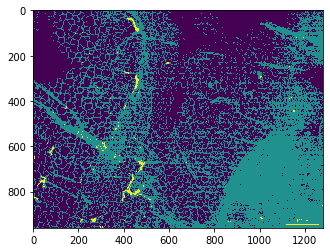

In [389]:
plt.imshow(clustered)
plt.imsave("output/crystals4-clusteredkequals4.jpg",clustered)


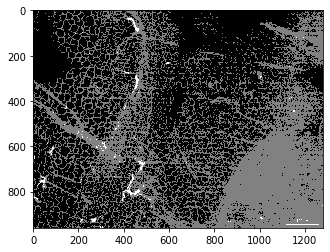

In [390]:
contours = measure.find_contours(clustered,0.4)
# Display the image and plot all contours found
#fig, ax = plt.subplots()
plt.imshow(clustered, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    


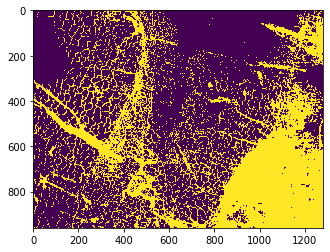

In [399]:
image = cv.imread("output/cvimage.jpg")
imgray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
ret, thresh = cv.threshold(imgray, 24, 255, 0)
plt.imshow(thresh)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [416]:
test = np.zeros((960,1280,3), np.uint8)
cv.drawContours(test, contours, 3, (100,0,0), 1)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [423]:
[len(x) for x in contours]


[2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 4,
 5,
 4,
 3,
 5,
 5,
 4,
 4,
 5,
 1,
 7,
 4,
 4,
 6,
 13,
 2,
 1,
 7,
 2,
 10,
 1,
 5,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 5,
 8,
 14,
 2,
 31,
 6,
 1,
 17,
 6,
 7,
 16,
 2,
 1,
 34,
 2,
 6,
 2,
 25,
 24,
 1,
 23,
 29,
 23,
 10,
 15,
 21,
 1,
 1,
 36,
 3,
 1,
 7,
 8,
 1,
 2,
 2,
 2,
 3,
 3,
 4,
 2,
 1,
 14,
 3,
 12,
 7,
 7,
 3,
 12,
 2,
 5,
 1,
 15,
 7,
 7,
 8,
 4,
 3,
 1,
 57,
 2,
 2,
 7,
 1,
 3,
 6,
 47,
 4,
 1,
 1,
 1,
 1,
 6,
 106,
 6,
 5,
 13,
 4,
 4,
 8,
 10,
 4,
 5,
 7,
 10,
 164,
 10,
 6,
 4,
 5,
 2,
 15,
 1,
 4,
 1,
 3,
 2,
 7,
 12,
 8,
 1,
 23,
 2,
 2,
 1,
 6,
 2,
 6,
 3,
 6,
 8,
 2,
 14,
 4,
 27,
 12,
 58,
 4,
 1,
 8,
 15,
 1,
 10,
 4,
 4,
 4,
 8,
 1,
 1,
 4,
 4,
 11,
 5,
 1,
 6,
 9,
 1,
 19,
 7,
 31,
 6,
 122,
 4,
 8,
 1,
 36,
 7,
 2,
 1,
 1,
 2,
 4,
 35,
 3,
 9,
 1,
 8,
 4,
 6,
 16,
 71,
 17,
 1,
 12,
 12,
 3,
 8,
 4,
 6,
 5,
 13,
 1,
 2,
 4,
 2,
 2,
 3,
 2,
 19,
 4,
 5,
 5,
 5,
 40,
 6,
 32,
 5,
 4,
 2,
 32,
 1,
 2,
 1,
 2,
 6,
 6,
 2,
 9,
